https://adventofcode.com/2022/day/12

In [1]:
from dataclasses import dataclass
from typing import Optional

import numpy as np

@dataclass
class Node():
    node_id: int
    height: int
    neighbours: list
    distance: Optional[int] = None
    visited: bool = False
    visited_from: Optional[int] = None
        
def load_data(filename: str) -> np.ndarray:
    with open(filename, 'r') as f:
        data = [list(line.strip()) for line in f.readlines()]
    return np.array(data, dtype=str)

def char_to_height(s: str) -> int:
    match s:
        case 'S':
            return 1
        case 'E':
            return 26
        case _:
            return ord(s)-96
        
def data_to_graph(data: np.ndarray) -> np.ndarray:
    heights = np.vectorize(char_to_height)(data)
    node_numbers = np.arange(data.size).reshape(data.shape[0], -1)
    nodes = []
    node_id = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            neighbours = []
            h = heights[i,j]
            if i > 0 and heights[i-1, j]:
                neighbours.append(node_numbers[i-1, j])
            if j > 0 and heights[i, j-1]:
                neighbours.append(node_numbers[i, j-1])
            if i < heights.shape[0] - 1:
                neighbours.append(node_numbers[i+1, j])
            if j < heights.shape[1] - 1:
                    neighbours.append(node_numbers[i, j+1])
            nodes.append(Node(node_id = node_id,
                              height = heights[i, j],
                              neighbours = neighbours))
            node_id += 1
    return nodes

def get_node_id_from_string(data: np.ndarray,
                            s: str) -> int:
    return np.dot(np.hstack(np.where(data == s)), [data.shape[1], 1])

def breadth_first_search(graph, start, accessible):
    start_node = graph[start]
    start_node.distance = 0
    start_node.visited = True
    queue = [start_node]
    steps = 0
    while queue:
        steps += 1
        this_node = queue.pop(0)
        for nnode in [graph[n] for n in this_node.neighbours]:
            if (not nnode.visited) and accessible(this_node.height, nnode.height):
                nnode.distance = this_node.distance + 1
                nnode.visited = True
                nnode.visited_from = this_node.node_id
                queue.append(nnode)
    
def solve_part_1(data):
    graph = data_to_graph(data)
    start = get_node_id_from_string(data, 'S')
    end = get_node_id_from_string(data, 'E')
    accessible = lambda n, nn: nn <= n + 1
    breadth_first_search(graph, start, accessible)
    return graph[end].distance

def solve_part_2(data):
    graph = data_to_graph(data)
    start = get_node_id_from_string(data, 'E')
    end = get_node_id_from_string(data, 'S')
    accessible = lambda n, nn: nn >= n - 1
    breadth_first_search(graph, start, accessible)
    return sorted([node for node in graph if node.height == 1 and node.visited],
                  key=lambda x: x.distance)[0].distance

In [2]:
filename = "../example_data/day12_example_data.txt"
example_data = load_data(filename)

filename = "../data/day12_data.txt"
data = load_data(filename)

In [3]:
solve_part_1(example_data)

31

In [4]:
solve_part_1(data)

504

In [5]:
solve_part_2(example_data)

29

In [6]:
solve_part_2(data)

500

In [7]:
# Bonus: Plotting the shortest path
graph = data_to_graph(data)
start = get_node_id_from_string(data, 'S')
end = get_node_id_from_string(data, 'E')
accessible = lambda n, nn: nn <= n + 1
breadth_first_search(graph, start, accessible)
# reconstruct a list of all nodes visited on the shortest path
shortest_path = [graph[end]]
while shortest_path[-1].visited_from:
    shortest_path.append(graph[shortest_path[-1].visited_from])

In [8]:
def node_id_to_loc(i, width):
    return i//width, i%width

In [9]:
path = np.zeros_like(data, dtype=int)
for n in shortest_path:
    path[node_id_to_loc(n.node_id, 159)] = 1

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [11]:
heights = np.vectorize(char_to_height)(data)

In [12]:
cmap = plt.cm.viridis
norm = plt.Normalize(heights.min(), heights.max())
rgba = cmap(norm(heights))
for x, y in zip(*np.where(path)):
    rgba[x,y] = rgba[x,y] * np.array([1,1,1,0.25])

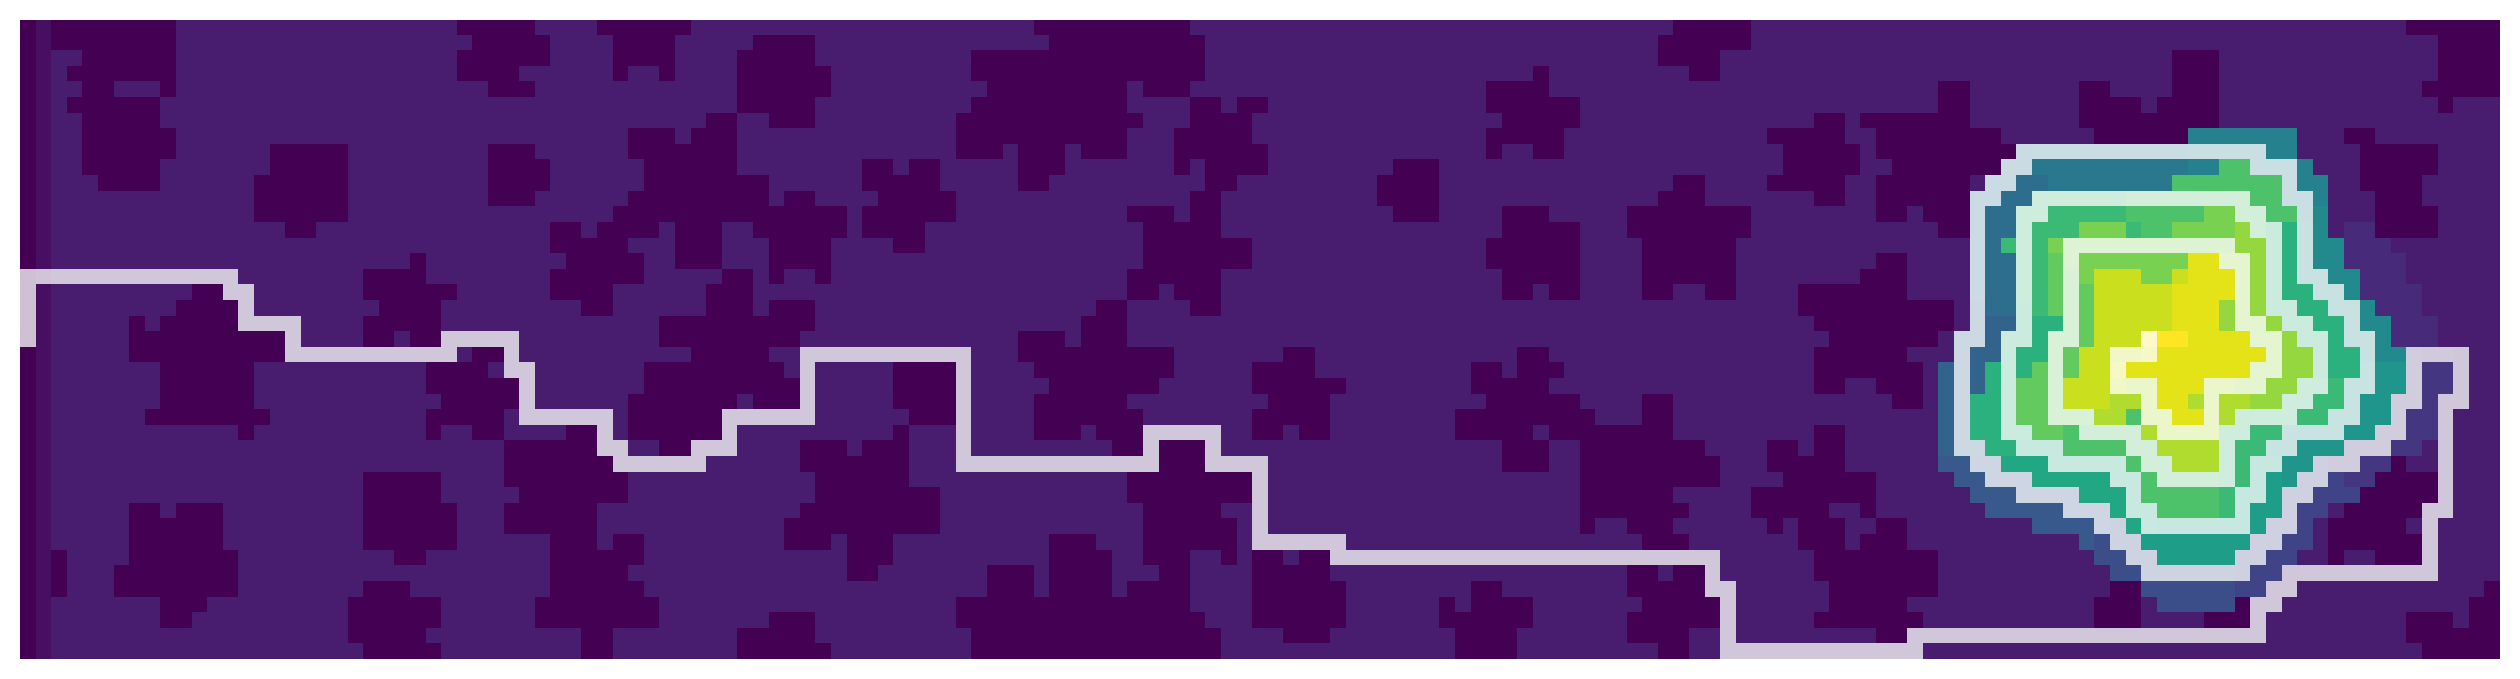

In [13]:
plt.matshow(rgba)
plt.grid(False)
plt.axis('off')
plt.show()